*   Paige – Business question, preprocessing, summarize data
*   Ashley – preprocessing models - Random forest, summarize data
*   Bhavuk - PCA + Linear Regression + Random forest
*   Vitan – KNN
*   Ingara – Report prep, Presentation Prep, Summarize data















In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Total_Emissions.csv')

# Checking the dataset
df.sample(10)

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
54422,Western Asia,Fertilizers Manufacturing,Emissions (N2O),kilotonnes,6.3652,6.5967,7.2363,6.6966,6.5043,6.8702,...,9.3453,9.3255,8.8486,9.2686,8.0996,7.5146,7.7185,9.5291,11.0943,11.3548
13090,Denmark,Food Processing,Emissions (N2O),kilotonnes,0.0299,0.0306,0.0295,0.0280,0.0294,0.0290,...,0.0259,0.0232,0.0219,0.0221,0.0222,0.0224,0.0231,0.0230,0.0230,0.0220
14091,Ecuador,LULUCF,Emissions (CH4),kilotonnes,0.0482,0.3352,0.0844,0.0450,0.0471,0.3973,...,0.0393,0.7305,0.0303,0.1173,0.3658,0.2158,0.0322,0.1819,0.4264,0.2621
42598,Spain,AFOLU,Emissions (CO2eq) from N2O (AR5),kilotonnes,15591.0450,15249.5466,15090.2818,16077.8937,15561.8160,14093.7272,...,13219.2373,12844.4675,13821.3612,14521.0033,14647.8507,14426.7731,14695.8923,14876.3235,14536.6083,15273.1048
22059,Iraq,Emissions on agricultural land,Emissions (CO2eq) from CH4 (AR5),kilotonnes,3829.1311,3758.5576,3726.1113,3044.0307,3350.3017,3857.3656,...,5347.1069,5492.4046,5175.9614,5185.2116,3796.9341,3967.1301,4148.4587,3826.1171,5239.8667,4928.2285
29149,Mexico,Waste,Emissions (N2O),kilotonnes,5.5800,5.6500,5.7200,5.8200,5.8900,5.9800,...,6.5000,6.6000,6.7500,7.0000,7.2500,7.5100,7.6700,7.7600,8.4500,8.1000
15311,Eswatini,Forest fires,Emissions (CO2eq) from N2O (AR5),kilotonnes,13.7000,5.2284,2.7644,10.3361,9.3746,6.3699,...,13.2810,9.7354,10.0357,9.0140,4.8675,6.9707,3.4855,1.9831,16.1058,3.5456
11888,Cyprus,Manure Management,Emissions (CH4),kilotonnes,4.1446,4.4008,4.6177,4.4771,4.2471,3.8017,...,3.1617,2.8464,2.5641,2.4239,2.3863,2.3618,2.2766,2.2879,2.2948,2.4526
43412,Suriname,All sectors without LULUCF,Emissions (CO2eq) from F-gases (AR5),kilotonnes,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6942,Burkina Faso,Land Use change,Emissions (N2O),kilotonnes,0.1876,0.0000,0.0002,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
df.shape

(58769, 25)

In [ ]:
df[df == 0] = np.nan

In [ ]:
df.isnull().sum()

Area           0
Item           0
Element        0
Unit           0
2000       10617
2001       12830
2002       12683
2003       12499
2004       12609
2005       12191
2006       12211
2007       12076
2008       12248
2009       12179
2010       11706
2011       12342
2012       11852
2013       12104
2014       12052
2015       12104
2016       12285
2017       12328
2018       12452
2019       12429
2020       12930
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.isnull().sum()

Area       0
Item       0
Element    0
Unit       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
dtype: int64

In [ ]:
df.shape

(43485, 25)

In [ ]:
# Applying PCA To the above given dataset
df.columns

Index(['Area', 'Item', 'Element', 'Unit', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

Ashley - graphs/charts

In [ ]:
#getting info of each columns dtype & na are presents
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43485 entries, 0 to 58768
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     43485 non-null  object 
 1   Item     43485 non-null  object 
 2   Element  43485 non-null  object 
 3   Unit     43485 non-null  object 
 4   2000     43485 non-null  float64
 5   2001     43485 non-null  float64
 6   2002     43485 non-null  float64
 7   2003     43485 non-null  float64
 8   2004     43485 non-null  float64
 9   2005     43485 non-null  float64
 10  2006     43485 non-null  float64
 11  2007     43485 non-null  float64
 12  2008     43485 non-null  float64
 13  2009     43485 non-null  float64
 14  2010     43485 non-null  float64
 15  2011     43485 non-null  float64
 16  2012     43485 non-null  float64
 17  2013     43485 non-null  float64
 18  2014     43485 non-null  float64
 19  2015     43485 non-null  float64
 20  2016     43485 non-null  float64
 21  2017     434

In [ ]:
# want to check the output of the type of emissions.
pd.DataFrame(df['Element'].unique().tolist())

,0
0,Direct emissions (N2O)
1,Indirect emissions (N2O)
2,Emissions (N2O)
3,Emissions (CO2eq) from N2O (AR5)
4,Emissions (CO2eq) (AR5)
5,Emissions (CH4)
6,Emissions (CO2eq) from CH4 (AR5)
7,Emissions (CO2)
8,Emissions (CO2eq) from F-gases (AR5)


In [ ]:
#description of int variables
df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,4.348500e+04,4.348500e+04,4.348500e+04,4.348500e+04,4.348500e+04,4.348500e+04,4.348500e+04,4.348500e+04,4.348500e+04,4.348500e+04,...,4.348500e+04,4.348500e+04,4.348500e+04,4.348500e+04,4.348500e+04,4.348500e+04,4.348500e+04,4.348500e+04,4.348500e+04,4.348500e+04
mean,4.929644e+04,4.862914e+04,5.018665e+04,5.115422e+04,5.342600e+04,5.414862e+04,5.589654e+04,5.611001e+04,5.687405e+04,5.704750e+04,...,5.837310e+04,5.914506e+04,5.951648e+04,6.059473e+04,6.091423e+04,6.096981e+04,6.165220e+04,6.273097e+04,6.337805e+04,6.084701e+04
std,5.874205e+05,5.842756e+05,5.992555e+05,6.197582e+05,6.480545e+05,6.640734e+05,6.871928e+05,6.987333e+05,7.137432e+05,7.120812e+05,...,7.567624e+05,7.696221e+05,7.742560e+05,7.863023e+05,7.880070e+05,7.855357e+05,7.958152e+05,8.132447e+05,8.195997e+05,7.867604e+05
min,-3.477871e+06,-3.148175e+06,-3.148175e+06,-3.148175e+06,-3.148175e+06,-3.379504e+06,-3.183029e+06,-3.148175e+06,-3.206885e+06,-3.284492e+06,...,-3.966553e+06,-3.966553e+06,-3.966553e+06,-3.966553e+06,-3.966553e+06,-3.331180e+06,-2.696392e+06,-2.702046e+06,-2.636985e+06,-2.636985e+06
25%,1.678800e+00,1.608500e+00,1.656000e+00,1.749000e+00,1.760000e+00,1.799000e+00,1.820000e+00,1.905000e+00,1.936900e+00,1.994900e+00,...,2.045700e+00,2.107800e+00,2.112100e+00,2.109200e+00,2.200600e+00,2.239700e+00,2.231300e+00,2.221200e+00,2.307600e+00,2.292700e+00
50%,6.666000e+01,6.339110e+01,6.631930e+01,6.953040e+01,7.028830e+01,7.435060e+01,7.446500e+01,7.803880e+01,7.803000e+01,7.962350e+01,...,8.192690e+01,8.335510e+01,8.376200e+01,8.519800e+01,8.620540e+01,8.875800e+01,8.927850e+01,8.965710e+01,8.948240e+01,9.116380e+01
75%,2.003390e+03,1.954011e+03,2.037241e+03,2.080641e+03,2.110361e+03,2.171715e+03,2.220888e+03,2.273760e+03,2.288540e+03,2.296695e+03,...,2.352299e+03,2.401055e+03,2.395441e+03,2.430000e+03,2.448619e+03,2.487781e+03,2.504337e+03,2.511593e+03,2.549051e+03,2.526562e+03
max,3.880104e+07,3.858777e+07,3.977286e+07,4.107819e+07,4.314763e+07,4.407000e+07,4.578420e+07,4.632066e+07,4.721273e+07,4.713105e+07,...,4.913564e+07,4.995763e+07,5.014924e+07,5.110725e+07,5.127620e+07,5.182366e+07,5.252879e+07,5.370033e+07,5.414186e+07,5.201086e+07


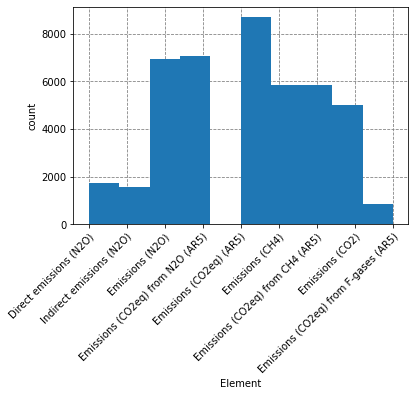

In [ ]:
#histogram plot of elements 
fig, ax = plt.subplots()
ax.hist(df.Element)
ax.set_axisbelow(True)  # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
ax.set_xlabel('Element')
ax.set_ylabel('count')
# Rotating X-axis labels
plt.xticks(rotation=45, ha='right',rotation_mode='anchor')
plt.show()

#seems some elemnts have 0 

In [ ]:
years = [str(x) for x in range(2000,2021)]
df2 = df.melt(id_vars = ['Area','Item','Element'],value_vars=years, var_name='Year', value_name='Emissions_kt')
df2.dropna(inplace=True)
df2.head(10)

,Area,Item,Element,Year,Emissions_kt
0,Afghanistan,Crop Residues,Direct emissions (N2O),2000,0.5200
1,Afghanistan,Crop Residues,Indirect emissions (N2O),2000,0.1170
2,Afghanistan,Crop Residues,Emissions (N2O),2000,0.6370
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),2000,168.8070
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),2000,168.8070
5,Afghanistan,Rice Cultivation,Emissions (CH4),2000,18.2000
6,Afghanistan,Rice Cultivation,Emissions (CO2eq) from CH4 (AR5),2000,509.6000
7,Afghanistan,Rice Cultivation,Emissions (CO2eq) (AR5),2000,509.6000
8,Afghanistan,Burning - Crop residues,Emissions (CH4),2000,2.6471
9,Afghanistan,Burning - Crop residues,Emissions (N2O),2000,0.0686


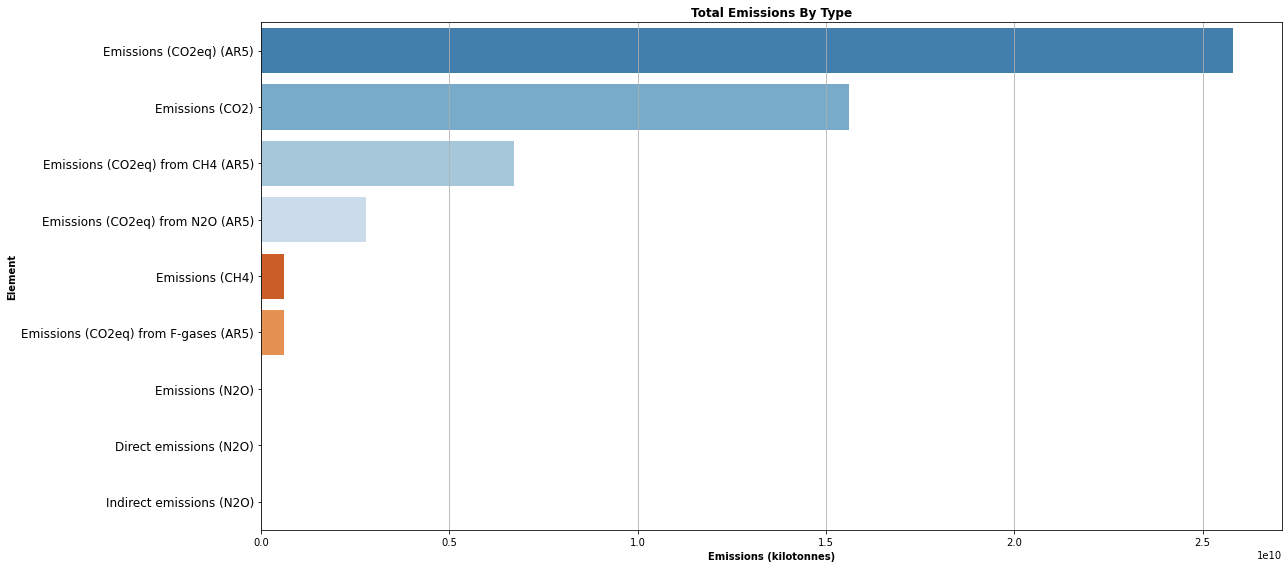

In [ ]:
#aggregate the data
df_agg = df2[['Element','Emissions_kt']].groupby(by=['Element']).sum().reset_index().sort_values(by='Emissions_kt', ascending=False)

plt.figure(figsize=(18,8))

ax = sns.barplot(data=df_agg, x='Emissions_kt', y='Element', palette=sns.color_palette("tab20c"))
ax.xaxis.grid()
ax.set_ylabel('Element', weight='bold')
ax.set_xlabel('Emissions (kilotonnes)', weight='bold')
ax.set_title('Total Emissions By Type', weight='bold')

plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# CO2eq = carbon dioxide equivalent
#AR5 = Fifth Assessment Report , Climate Change 
#seems Emission (CO2eq) (AR5) is the highest emission used by the total years, second to CO2

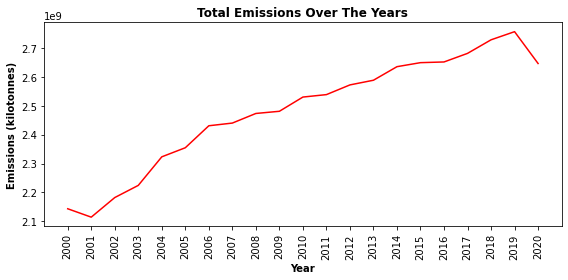

In [ ]:
#line graph of total emissions over the the years
df_agg = df2[['Year','Emissions_kt']].groupby(by=['Year']).sum().reset_index()

plt.figure(figsize=(8,4))

ax = sns.lineplot(data=df_agg, x='Year', y='Emissions_kt', color='red')
ax.set_ylabel('Emissions (kilotonnes)', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_title('Total Emissions Over The Years', weight='bold')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
pd.DataFrame(df2['Item'].unique().tolist())

,0
0,Crop Residues
1,Rice Cultivation
2,Burning - Crop residues
3,Enteric Fermentation
4,Manure Management
5,Manure left on Pasture
6,Manure applied to Soils
7,Synthetic Fertilizers
8,On-farm energy use
9,Forestland


In [ ]:
#want to  elimnate some of the items that are not significant and leave the top 5
index_names = df2[(df2['Emissions_kt'] <= 10000000 )].index
# drop these given row
# indexes from dataFrame
df2.drop(index_names, inplace = True)
df2

,Area,Item,Element,Year,Emissions_kt
35978,World,Energy,Emissions (CO2),2000,23424334.21
35981,World,Energy,Emissions (CO2eq) (AR5),2000,26511331.38
36026,World,Emissions on agricultural land,Emissions (CO2eq) (AR5),2000,11002329.55
36040,World,Agri-food systems,Emissions (CO2eq) (AR5),2000,14865213.50
36078,World,All sectors with LULUCF,Emissions (CO2),2000,27492903.74
...,...,...,...,...,...
913089,OECD,Energy,Emissions (CO2eq) (AR5),2020,10952874.50
913169,OECD,All sectors with LULUCF,Emissions (CO2),2020,10458203.63
913173,OECD,All sectors with LULUCF,Emissions (CO2eq) (AR5),2020,14024804.49
913176,OECD,All sectors without LULUCF,Emissions (CO2),2020,10889190.14


In [ ]:
pd.DataFrame(df2['Item'].unique().tolist())
df2.describe()

,Emissions_kt
count,9.240000e+02
mean,1.836991e+07
std,9.286977e+06
min,1.001482e+07
25%,1.222979e+07
50%,1.486279e+07
75%,2.057430e+07
max,5.414186e+07


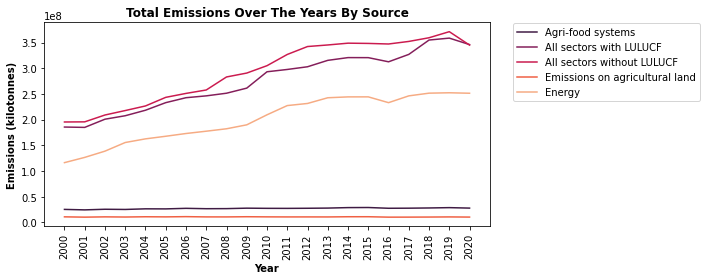

In [ ]:
df_agg = df2[['Year', 'Item', 'Emissions_kt']].groupby(by=['Year', 'Item']).sum().reset_index()

plt.figure(figsize=(10,4))

ax = sns.lineplot(data=df_agg, x='Year', y='Emissions_kt', hue='Item', palette='rocket')
ax.set_ylabel('Emissions (kilotonnes)', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_title('Total Emissions Over The Years By Source', weight='bold')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



# Energy, All sectors w/ LULUCF, and All sectors w/o LULUCF are the top 3 most impacted sources that emit more throughout the years.
# LULUCF - Land Use, Land-use Change and Forestry


# Bhavuk
# Applying PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select the columns that we want to use for PCA
columns = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


pca_df = df[columns]

# Replace missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(pca_df), columns= pca_df.columns)

# Apply PCA to the imputed data
pca = PCA(n_components=4)
X_pca = pca.fit_transform(df)


# Apply PCA to the normalized data
pca = PCA()
pca.fit(X_pca)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print(explained_variance_ratio)

[9.88722132e-01 1.06393718e-02 4.53660892e-04 1.84834947e-04]


In [ ]:
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                           'Proportion of variance': pca.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary.columns) + 1)]
pcsSummary.round(3)

,PC1,PC2,PC3,PC4
Standard deviation,3300309.539,342354.105,70694.108,45124.208
Proportion of variance,0.989,0.011,0.000,0.000
Cumulative proportion,0.989,0.999,1.000,1.000


In [ ]:
df.columns

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')

In [ ]:
!pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 63.4 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

no display found. Using non-interactive Agg backend


# Applying Linear Regression

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Load the dataset
data = pd.read_csv('Total_Emissions.csv')


# Define the regressionSummary function
def regressionSummary(y, yhat):
    r2 = r2_score(y, yhat)
    mse = mean_squared_error(y, yhat)
    print('R-squared:', r2)
    print('Mean Squared Error:', mse)

le = LabelEncoder()
data['Area'] = le.fit_transform(data['Area'])
data['Item'] = le.fit_transform(data['Item'])
data['Element'] = le.fit_transform(data['Element'])
data['Unit'] = le.fit_transform(data['Unit'])
data.drop(['Unit'],axis=1,inplace=True)
data.dropna(inplace=True)
data.drop_duplicates()

data = data.sample(3000)

X = df[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
y = df['2020']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

data_lm = LinearRegression()
data_lm.fit(X_train, y_train)

# print coefficients
print('intercept ', data_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': data_lm.coef_}))

# print performance measures
regressionSummary(y_train, data_lm.predict(X_train))

y_predict = data_lm.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_predict)
print('R-squared score:', r2)

# Calculate adjusted R-squared score
n = X_test.shape[0]
p = X_test.shape[1]
r2_adj = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print('Adjusted R-squared score:', r2_adj)


intercept  447.0396752197921
   Predictor  coefficient
0       2000     0.080066
1       2001     0.469475
2       2002    -1.168936
3       2003     1.342283
4       2004    -1.480330
5       2005     1.737389
6       2006    -0.248057
7       2007    -0.566081
8       2008    -0.377902
9       2009     0.342076
10      2010    -0.080962
11      2011    -0.916222
12      2012     1.191356
13      2013     0.650444
14      2014     0.057916
15      2015    -1.072427
16      2016    -1.044772
17      2017     0.821423
18      2018    -3.314531
19      2019     4.544726
R-squared: 0.9915530967328084
Mean Squared Error: 5638774691.051821
R-squared score: 0.9989347774433326
Adjusted R-squared score: 0.9989323218818834


# Showing Results Graphically

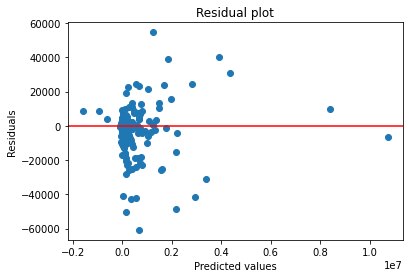

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('Total_Emissions.csv')
df = df.sample(3000)

le = LabelEncoder()
df['Area'] = le.fit_transform(df['Area'])
df['Item'] = le.fit_transform(df['Item'])
df['Element'] = le.fit_transform(df['Element'])
df.drop(['Unit'],axis=1,inplace=True)
df.dropna(inplace=True)
df.drop_duplicates()

# Define predictor and response variables
X = df[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
y = df['2020']

# Fit linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Residual plot
fig, ax = plt.subplots()
ax.scatter(model.predict(), model.resid)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()


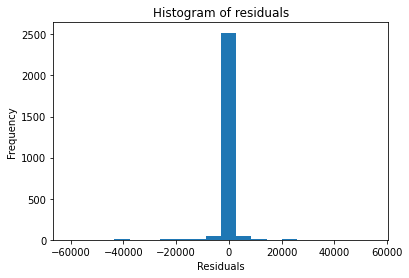

In [ ]:

# Histogram of residuals
fig, ax = plt.subplots()
ax.hist(model.resid, bins=20)
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of residuals')
plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


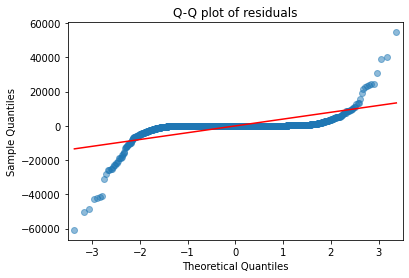

In [ ]:

# Q-Q plot of residuals
fig, ax = plt.subplots()
QQ = ProbPlot(model.resid)
QQ.qqplot(line='s', alpha=0.5, color='#4C72B0', lw=1, ax=ax)
ax.set_title('Q-Q plot of residuals')
plt.show()


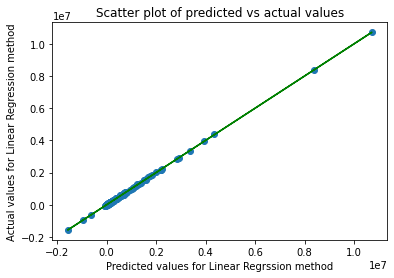

In [ ]:

# Scatter plot of predicted vs actual values
fig, ax = plt.subplots()
ax.scatter(model.predict(), y)
ax.plot(y, y, color='g')
ax.set_xlabel('Predicted values for Linear Regrssion method')
ax.set_ylabel('Actual values for Linear Regression method')
ax.set_title('Scatter plot of predicted vs actual values')
plt.show()


# Vitan 
# KNN

In [ ]:
# Applying KNN on the dataset and showing out the result
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Total_Emissions.csv')
data = data.sample(3000)

le = LabelEncoder()
data['Area'] = le.fit_transform(data['Area'])
data['Item'] = le.fit_transform(data['Item'])
data['Element'] = le.fit_transform(data['Element'])
data.drop(['Unit'],axis=1,inplace=True)
data.dropna(inplace=True)
data.drop_duplicates()

X = data[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
y = data['2020']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Impute missing values in the training and test data
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = imputer.fit_transform(y_test.values.reshape(-1, 1)).ravel()

# Create a KNN regression model with k=5
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

# Calculate adjusted R-squared score
n = X_test.shape[0]
p = X_test.shape[1]
r2_adj = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print('Adjusted R-squared score:', r2_adj)

R-squared score: 0.7416225160836687
Adjusted R-squared score: 0.731607884924121


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


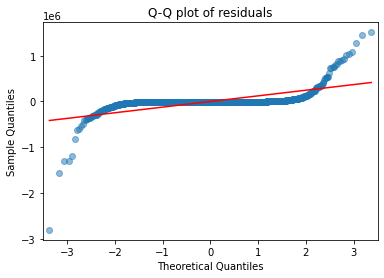

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.preprocessing import LabelEncoder


# Q-Q plot of residuals
model = sm.OLS(y, sm.add_constant(X)).fit()
fig, ax = plt.subplots()
QQ = ProbPlot(model.resid)
QQ.qqplot(line='s', alpha=0.5, color='#4C72B0', lw=1, ax=ax)
ax.set_title('Q-Q plot of residuals')
plt.show()


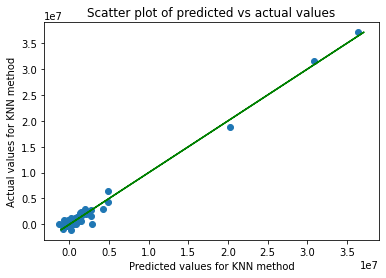

In [ ]:
# Scatter plot of predicted vs actual values
model = sm.OLS(y, sm.add_constant(X)).fit()
fig, ax = plt.subplots()
ax.scatter(model.predict(), y)
ax.plot(y, y, color='g')
ax.set_xlabel('Predicted values for KNN method')
ax.set_ylabel('Actual values for KNN method')
ax.set_title('Scatter plot of predicted vs actual values')
plt.show()


# Bhavuk 
# Applying Random Forest and showing results Graphically


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

# Load data
df = pd.read_csv('Total_Emissions.csv')
df = df.sample(3000)

# Convert categorical variables to numeric using LabelEncoder
le = LabelEncoder()
df['Area'] = le.fit_transform(df['Area'])
df['Item'] = le.fit_transform(df['Item'])
df['Element'] = le.fit_transform(df['Element'])
df.drop(['Unit'], axis=1, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates()

# Define predictor and response variables
X = df[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
y = df['2020']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


R2 score: 0.96
Mean Squared Error: 26592168843.19
Root Mean Squared Error: 163071.05


In [ ]:
from sklearn.model_selection import KFold
import pandas as pd

# Load data
df = pd.read_csv('Total_Emissions.csv')
df = df.sample(3000)

# Convert categorical variables to numeric using LabelEncoder
le = LabelEncoder()
df['Area'] = le.fit_transform(df['Area'])
df['Item'] = le.fit_transform(df['Item'])
df['Element'] = le.fit_transform(df['Element'])
df.drop(['Unit'], axis=1, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates()


# Reset the index of the DataFrame
df = df.reset_index(drop=True)

# Separate the target variable from the features
X = df[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
y = df['2020']

# Initialize a KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the splits of the KFold cross-validator
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# Define predictor and response variables
X = df[['Area', 'Item', 'Element', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
y = df['2020']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R2 score: 0.93
Mean Squared Error: 4966600512.12
Root Mean Squared Error: 70474.11


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


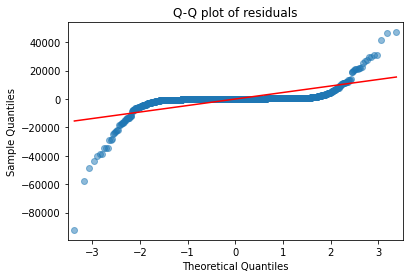

In [ ]:
# Q-Q plot of residuals
model = sm.OLS(y, sm.add_constant(X)).fit()
fig, ax = plt.subplots()
QQ = ProbPlot(model.resid)
QQ.qqplot(line='s', alpha=0.5, color='#4C72B0', lw=1, ax=ax)
ax.set_title('Q-Q plot of residuals')
plt.show()

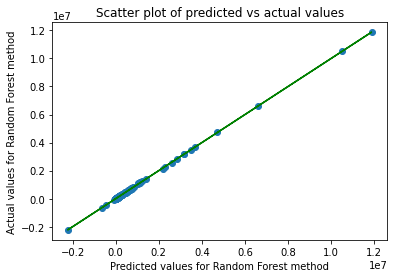

In [ ]:
# Scatter plot of predicted vs actual values
model = sm.OLS(y, sm.add_constant(X)).fit()
fig, ax = plt.subplots()
ax.scatter(model.predict(), y)
ax.plot(y, y, color='g')
ax.set_xlabel('Predicted values for Random Forest method')
ax.set_ylabel('Actual values for Random Forest method')
ax.set_title('Scatter plot of predicted vs actual values')
plt.show()

Ashley - Preprocessing


In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import graphviz

In [ ]:
df = pd.read_csv('Total_Emissions.csv')
df[df == 0] = np.nan          #using Paige cleaning codes 
df.dropna(axis=0, inplace=True)
df.isnull().sum()
df.shape

(43485, 25)

In [ ]:
pd.DataFrame(df['Area'].unique().tolist())

,0
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra
...,...
260,Low Income Food Deficit Countries
261,Net Food Importing Developing Countries
262,Annex I countries
263,Non-Annex I countries


In [ ]:
pip install pycountry-convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 40.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.2/317.2 KB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.9/226.9 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 KB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.8/316.8 KB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 KB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 KB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 KB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 KB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#pip install pycountry-convert
import pycountry_convert as pc

def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        print(f"{country_name}: {continent_name}")
        return continent_name
    except KeyError:
        print(f"Error: {country_name}")
        return None
    
df['Continent'] = df['Area'].map(get_continent)

Streaming output truncated to the last 5000 lines.
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Asia
Error: Central Asia
Error: Central Asia
Error: Central Asia
Error: Central Asia
Error: Central Asia
Error: Central Asia
Error: Central Asia
Error: Central Asia
Error: Central Asia
Error: Central Asia
Error: Central Asia
Error: Ce

Paige - graphs/charts

In [ ]:
#pip install geopandas
!apt-get install -q libspatialindex-dev libspatialindex-c4v5
!pip install -q geopandas

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libspatialindex-c4v5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 52.0 MB/s eta 0:00:00


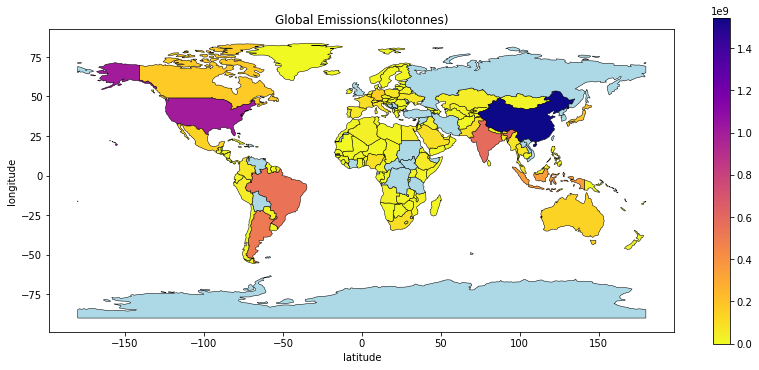

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
mapdf2 = pd.melt(df, id_vars = ['Area','Item','Element'],
               value_vars = df.iloc[:,4:].columns,
               var_name = 'Year',
               value_name = 'Total_Emissions')

mapdf2['Total_Emissions'] = pd.to_numeric(mapdf2['Total_Emissions'], errors='coerce')
mapdf2.dropna(subset=['Total_Emissions'], inplace=True)
mapdf2_agg = mapdf2[['Area','Total_Emissions']].groupby('Area').sum().reset_index().sort_values(by='Total_Emissions', ascending=False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
world_map = world.merge(mapdf2_agg, left_on='name', right_on='Area', how='left')


x = world_map.plot(column='Total_Emissions',
            cmap='plasma_r',
            edgecolor='Black', # Colour of the country borders
            linewidth=0.5, # Line width of the country borders
            missing_kwds={"color": "lightblue"}, # Missing data colour
            legend=True)
x.set_title('Global Emissions(kilotonnes)')
x.set_xlabel('latitude')
x.set_ylabel('longitude')
plt.gcf().set_size_inches(14,6)
plt.show()

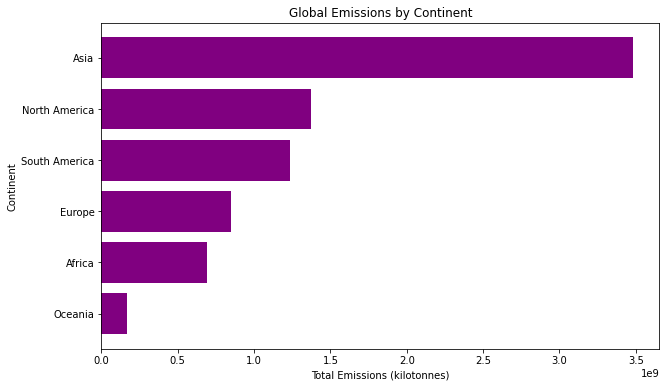

In [ ]:
mapdf2 = pd.melt(df, id_vars=['Area', 'Item', 'Element'],
                 value_vars=df.iloc[:, 4:].columns,
                 var_name='Year',
                 value_name='Total_Emissions')
mapdf2['Total_Emissions'] = pd.to_numeric(mapdf2['Total_Emissions'], errors='coerce')
mapdf2.dropna(subset=['Total_Emissions'], inplace=True)

# Aggregate the data by continent
mapdf2_agg = mapdf2.merge(world[['continent', 'name']], left_on='Area', right_on='name', how='left')
mapdf2_agg = mapdf2_agg.groupby('continent').sum().reset_index().sort_values(by='Total_Emissions', ascending=True)

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(mapdf2_agg['continent'], mapdf2_agg['Total_Emissions'], color='purple')

# Set the chart title and axis labels
ax.set_title('Global Emissions by Continent')
ax.set_xlabel('Total Emissions (kilotonnes)')
ax.set_ylabel('Continent')

plt.show()

In [ ]:
df.head()

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Continent
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,0.520,0.5267,0.8200,0.9988,0.8225,1.1821,...,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170,Asia
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,0.117,0.1185,0.1845,0.2247,0.1851,0.2660,...,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963,Asia
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,0.637,0.6452,1.0045,1.2235,1.0075,1.4481,...,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133,Asia
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,168.807,170.9884,266.1975,324.2195,266.9995,383.7498,...,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284,Asia
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.807,170.9884,266.1975,324.2195,266.9995,383.7498,...,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284,Asia


In [ ]:
df.count()

Area         33758
Item         33758
Element      33758
Unit         33758
2000         33758
2001         33758
2002         33758
2003         33758
2004         33758
2005         33758
2006         33758
2007         33758
2008         33758
2009         33758
2010         33758
2011         33758
2012         33758
2013         33758
2014         33758
2015         33758
2016         33758
2017         33758
2018         33758
2019         33758
2020         33758
Continent    33758
dtype: int64

In [ ]:
df = df.dropna()
df = df.drop_duplicates()
df.count()

Area         33758
Item         33758
Element      33758
Unit         33758
2000         33758
2001         33758
2002         33758
2003         33758
2004         33758
2005         33758
2006         33758
2007         33758
2008         33758
2009         33758
2010         33758
2011         33758
2012         33758
2013         33758
2014         33758
2015         33758
2016         33758
2017         33758
2018         33758
2019         33758
2020         33758
Continent    33758
dtype: int64

In [ ]:
df3 = df[(df['Element'] == 'Emissions (CO2eq) (AR5)') | (df['Element'] == 'Emissions (CO2)')]
df3

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Continent
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.8070,170.9884,266.1975,324.2195,266.9995,383.7498,...,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284,Asia
7,Afghanistan,Rice Cultivation,Emissions (CO2eq) (AR5),kilotonnes,509.6000,474.3200,529.2000,568.4000,764.4000,627.2000,...,803.6000,803.6000,862.4000,642.8800,466.4800,429.0518,460.7529,499.9176,578.4156,Asia
16,Afghanistan,Burning - Crop residues,Emissions (CO2eq) (AR5),kilotonnes,92.3047,80.9172,82.1318,118.6191,104.9208,121.1805,...,118.6822,120.3242,123.4857,102.6989,107.1710,97.6259,74.5882,103.5392,121.4398,Asia
22,Afghanistan,Enteric Fermentation,Emissions (CO2eq) (AR5),kilotonnes,7619.9200,6311.2840,8061.0040,8221.5280,7996.7440,8271.2280,...,11113.7880,11006.6040,11152.0360,10715.4312,10648.1387,10382.7732,10611.9842,10189.2498,10600.4026,Asia
30,Afghanistan,Manure Management,Emissions (CO2eq) (AR5),kilotonnes,517.4928,426.2058,592.5613,603.1024,576.0374,604.7668,...,836.9089,832.8961,842.5037,797.9007,793.9377,768.6802,789.3364,766.5012,785.3315,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56450,Micronesia,AFOLU,Emissions (CO2eq) (AR5),kilotonnes,176.6645,176.5637,177.3436,177.4609,177.5866,177.7863,...,226.5732,228.4099,228.8963,230.0890,854.3282,854.1860,855.3033,856.9848,858.2546,Oceania
56453,Micronesia,All sectors with LULUCF,Emissions (CO2),kilotonnes,675.6134,693.3074,692.7734,693.9464,707.7694,695.5304,...,730.7773,751.3453,769.3213,783.6023,1399.2499,1415.0269,1450.3069,1513.3159,1506.0699,Oceania
56456,Micronesia,All sectors with LULUCF,Emissions (CO2eq) (AR5),kilotonnes,867.6154,888.9277,846.1659,857.1421,871.2662,890.1924,...,956.2389,923.9299,937.7363,957.5195,1573.8105,1592.6036,1628.2815,1693.2029,1685.4970,Oceania
56459,Micronesia,All sectors without LULUCF,Emissions (CO2),kilotonnes,561.4130,579.5340,579.0000,580.1730,593.9960,581.7570,...,576.5360,597.1040,615.0800,629.3610,622.0570,637.8340,673.1140,736.1230,728.8770,Oceania


In [ ]:
pd.DataFrame(df3['Element'].unique().tolist())

,0
0,Emissions (CO2eq) (AR5)
1,Emissions (CO2)


In [ ]:
df3.head()

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Continent
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.8070,170.9884,266.1975,324.2195,266.9995,383.7498,...,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284,Asia
7,Afghanistan,Rice Cultivation,Emissions (CO2eq) (AR5),kilotonnes,509.6000,474.3200,529.2000,568.4000,764.4000,627.2000,...,803.6000,803.6000,862.4000,642.8800,466.4800,429.0518,460.7529,499.9176,578.4156,Asia
16,Afghanistan,Burning - Crop residues,Emissions (CO2eq) (AR5),kilotonnes,92.3047,80.9172,82.1318,118.6191,104.9208,121.1805,...,118.6822,120.3242,123.4857,102.6989,107.1710,97.6259,74.5882,103.5392,121.4398,Asia
22,Afghanistan,Enteric Fermentation,Emissions (CO2eq) (AR5),kilotonnes,7619.9200,6311.2840,8061.0040,8221.5280,7996.7440,8271.2280,...,11113.7880,11006.6040,11152.0360,10715.4312,10648.1387,10382.7732,10611.9842,10189.2498,10600.4026,Asia
30,Afghanistan,Manure Management,Emissions (CO2eq) (AR5),kilotonnes,517.4928,426.2058,592.5613,603.1024,576.0374,604.7668,...,836.9089,832.8961,842.5037,797.9007,793.9377,768.6802,789.3364,766.5012,785.3315,Asia


In [ ]:
dummies = pd.get_dummies(df3[['Continent', 'Element']])
dummies.head()

,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Element_Emissions (CO2),Element_Emissions (CO2eq) (AR5)
4,0,1,0,0,0,0,0,1
7,0,1,0,0,0,0,0,1
16,0,1,0,0,0,0,0,1
22,0,1,0,0,0,0,0,1
30,0,1,0,0,0,0,0,1


In [ ]:
merge = pd.concat([df3,dummies],axis=1)
merge.head()

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2020,Continent,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Element_Emissions (CO2),Element_Emissions (CO2eq) (AR5)
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.8070,170.9884,266.1975,324.2195,266.9995,383.7498,...,427.5284,Asia,0,1,0,0,0,0,0,1
7,Afghanistan,Rice Cultivation,Emissions (CO2eq) (AR5),kilotonnes,509.6000,474.3200,529.2000,568.4000,764.4000,627.2000,...,578.4156,Asia,0,1,0,0,0,0,0,1
16,Afghanistan,Burning - Crop residues,Emissions (CO2eq) (AR5),kilotonnes,92.3047,80.9172,82.1318,118.6191,104.9208,121.1805,...,121.4398,Asia,0,1,0,0,0,0,0,1
22,Afghanistan,Enteric Fermentation,Emissions (CO2eq) (AR5),kilotonnes,7619.9200,6311.2840,8061.0040,8221.5280,7996.7440,8271.2280,...,10600.4026,Asia,0,1,0,0,0,0,0,1
30,Afghanistan,Manure Management,Emissions (CO2eq) (AR5),kilotonnes,517.4928,426.2058,592.5613,603.1024,576.0374,604.7668,...,785.3315,Asia,0,1,0,0,0,0,0,1


In [ ]:
final = merge.drop(['Area', 'Unit', 'Item', 'Element', 'Continent'], axis=1)
final.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2019,2020,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Element_Emissions (CO2),Element_Emissions (CO2eq) (AR5)
4,168.8070,170.9884,266.1975,324.2195,266.9995,383.7498,333.6093,403.3749,287.9099,451.8647,...,395.2689,427.5284,0,1,0,0,0,0,0,1
7,509.6000,474.3200,529.2000,568.4000,764.4000,627.2000,627.2000,666.4000,744.8000,784.0000,...,499.9176,578.4156,0,1,0,0,0,0,0,1
16,92.3047,80.9172,82.1318,118.6191,104.9208,121.1805,113.4512,114.7976,103.4756,120.7005,...,103.5392,121.4398,0,1,0,0,0,0,0,1
22,7619.9200,6311.2840,8061.0040,8221.5280,7996.7440,8271.2280,8422.5960,8518.3000,9507.6520,9678.4240,...,10189.2498,10600.4026,0,1,0,0,0,0,0,1
30,517.4928,426.2058,592.5613,603.1024,576.0374,604.7668,626.2428,647.4684,715.9345,725.4414,...,766.5012,785.3315,0,1,0,0,0,0,0,1


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd



# partition data
X = final.drop(columns=["2020"])
y = final["2020"]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1) #using 80% of the data

final_lm = LinearRegression()
final_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', final_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': final_lm.coef_}))

# print performance measures
regressionSummary(train_y, final_lm.predict(train_X))

intercept  -30.953908980332926
                          Predictor  coefficient
0                              2000    -0.008203
1                              2001     0.521091
2                              2002    -0.664414
3                              2003     0.410602
4                              2004    -0.545341
5                              2005     0.067058
6                              2006     0.381337
7                              2007     0.024147
8                              2008    -0.672407
9                              2009    -0.061843
10                             2010     0.556814
11                             2011     0.049222
12                             2012     0.053117
13                             2013     0.180751
14                             2014    -0.070859
15                             2015    -0.232497
16                             2016    -0.266197
17                             2017     0.810332
18                             2018   

In [ ]:
final_lm.predict(train_X)
#using test y to predict to see if test x is the correct prediction variable of y if the validiation is high

array([1.67237560e+05, 4.06848794e+03, 7.36683922e+04, ...,
       2.19129388e+03, 1.16682960e+02, 2.79605990e+03])

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = final.drop(columns=["2020"])
y = final["2020"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 1)

print('Training X Shape:', train_X.shape)
print('Training y Shape:', train_y.shape)
print('Testing X Shape:', test_X.shape)
print('Testing y Shape:', test_y.shape)

Training X Shape: (7980, 28)
Training y Shape: (7980,)
Testing X Shape: (2660, 28)
Testing y Shape: (2660,)


In [ ]:
# Calculate the average baseline error
baseline_preds = np.full(test_y.shape, np.mean(train_y))
baseline_errors = abs(baseline_preds - test_y)
avg_baseline_error = np.mean(baseline_errors)

# Print the average baseline error
print(f"Average Baseline Error: {avg_baseline_error:.2f}")

Average Baseline Error: 55300.35


In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

final = final.sample(3000)

# Split the data into training and testing sets
X = final.drop(columns=["2020"])
y = final["2020"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the model on training data which is n_estimators is 500 decision tree
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(train_X, train_y)

# Use the forest's predict method on the test data
y_pred = rf.predict(test_X)
r2 = r2_score(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)

# Calculate the mean absolute error
mae = mean_absolute_error(test_y, y_pred)


print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Absolute Error: 3172.71
R2 score: 0.96
Mean Squared Error: 1089831569.83
Root Mean Squared Error: 33012.60


In [ ]:
# Calculate the mean absolute percentage error
mape = np.mean(np.abs((test_y - y_pred) / test_y)) * 100

# Calculate the accuracy
accuracy = 100 - mape

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}%")
 #accuracy is 83.30%, the model is good to use but may need more train X variables from the columns to improve this model

Accuracy: 83.62%


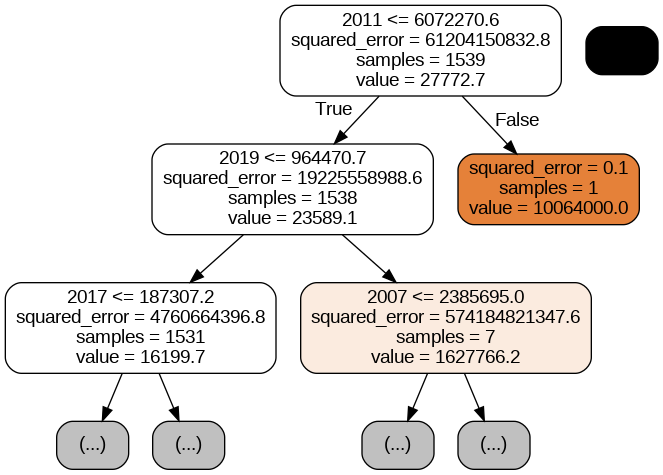

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

X = final.drop(columns=["2020"])
y = final["2020"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

rf_small = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)
rf_small.fit(train_X, train_y)

# Use the forest's predict method on the test data
y_pred = rf_small.predict(test_X)
r2 = r2_score(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)

# Calculate the mean absolute error
mae = mean_absolute_error(test_y, y_pred)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Extract the feature names
feature_list = list(X.columns)

# Convert the small tree to a dot file with labels
export_graphviz(tree_small, out_file='small_tree.dot', feature_names=feature_list, filled=True, rounded=True, precision=1, max_depth=2)

# Convert the dot file to a PNG image
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

Image(filename='small_tree.png')